# Example 12.2: Joule-Thomson Coefficient

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
Estimate the Joule-Thomson coefficient for R-134a at $80^\circ\mathrm{C}$ and $200\ \mathrm{kPa}$

## Solution


### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [3]:
from kilojoule.templates.default import *
import numpy as np

# Define variable representation
set_latex(dict(
    dTdp_h_forward = r'\left.\frac{\partial T}{\partial p}\right|_{h,forward}',
    dTdp_h_central = r'\left.\frac{\partial T}{\partial p}\right|_{h,central}',
    dTdp_h_backward = r'\left.\frac{\partial T}{\partial p}\right|_{h,backward}'
    ))
   
ref = realfluid.Properties('R134a')

In [5]:
%%showcalc
"State of interest"
p['A'] = Quantity(200,'kPa')
T['A'] = Quantity(80,'degC')
states.fix('A',ref)

"Forward state"
p['B'] = Quantity(240,'kPa')
h['B'] = h['A']
states.fix('B',ref)

"Backward state"
p['C'] = Quantity(180,'kPa')
h['C'] = h['A']
states.fix('C',ref)

"Forward Difference"
dTdp_h_forward = (T['B']-T['A'])/(p['B']-p['A'])

"Backward Difference"
dTdp_h_backward = (T['C']-T['A'])/(p['C']-p['A'])

"Central Difference"
dTdp_h_central = (T['B']-T['C'])/(p['B']-p['C'])

State of interest
\begin{align}
  {p}_{ A } &=  200\ \mathrm{kPa} 
\end{align}

\begin{align}
  {T}_{ A } &=  80\ \mathrm{°C}  = 353.15\ \mathrm{K} 
\end{align}

Fixing state A using previously defined values.
Forward state
\begin{align}
  {p}_{ B } &=  240\ \mathrm{kPa} 
\end{align}

\begin{align}
  {h}_{ B } &=  {h}_{ A }  = 472.54\ \frac{\mathrm{kJ}}{\mathrm{kg}} 
\end{align}

Fixing state B using previously defined values.
Backward state
\begin{align}
  {p}_{ C } &=  180\ \mathrm{kPa} 
\end{align}

\begin{align}
  {h}_{ C } &=  {h}_{ A }  = 472.54\ \frac{\mathrm{kJ}}{\mathrm{kg}} 
\end{align}

Fixing state C using previously defined values.
Forward Difference
\begin{align}
  \left.\frac{\partial T}{\partial p}\right|_{h,forward} &=  \frac{  {T}_{ B } - {T}_{ A }  }{  {p}_{ B } - {p}_{ A }  } \\
    &= \frac{  353.64\ \mathrm{K} - 353.15\ \mathrm{K}  }{  240\ \mathrm{kPa} - 200\ \mathrm{kPa}  }\\
    &= 0.012295\ \frac{\mathrm{K}}{\mathrm{kPa}}
\end{align}

Backward Difference
\begin{align}
  \left.\frac{\partial T}{\partial p}\right|_{h,backward} &=  \frac{  {T}_{ C } - {T}_{ A }  }{  {p}_{ C } - {p}_{ A }  } \\
    &= \frac{  352.9\ \mathrm{K} - 353.15\ \mathrm{K}  }{  180\ \mathrm{kPa} - 200\ \mathrm{kPa}  }\\
    &= 0.012303\ \frac{\mathrm{K}}{\mathrm{kPa}}
\end{align}

Central Difference
\begin{align}
  \left.\frac{\partial T}{\partial p}\right|_{h,central} &=  \frac{  {T}_{ B } - {T}_{ C }  }{  {p}_{ B } - {p}_{ C }  } \\
    &= \frac{  353.64\ \mathrm{K} - 352.9\ \mathrm{K}  }{  240\ \mathrm{kPa} - 180\ \mathrm{kPa}  }\\
    &= 0.012298\ \frac{\mathrm{K}}{\mathrm{kPa}}
\end{align}



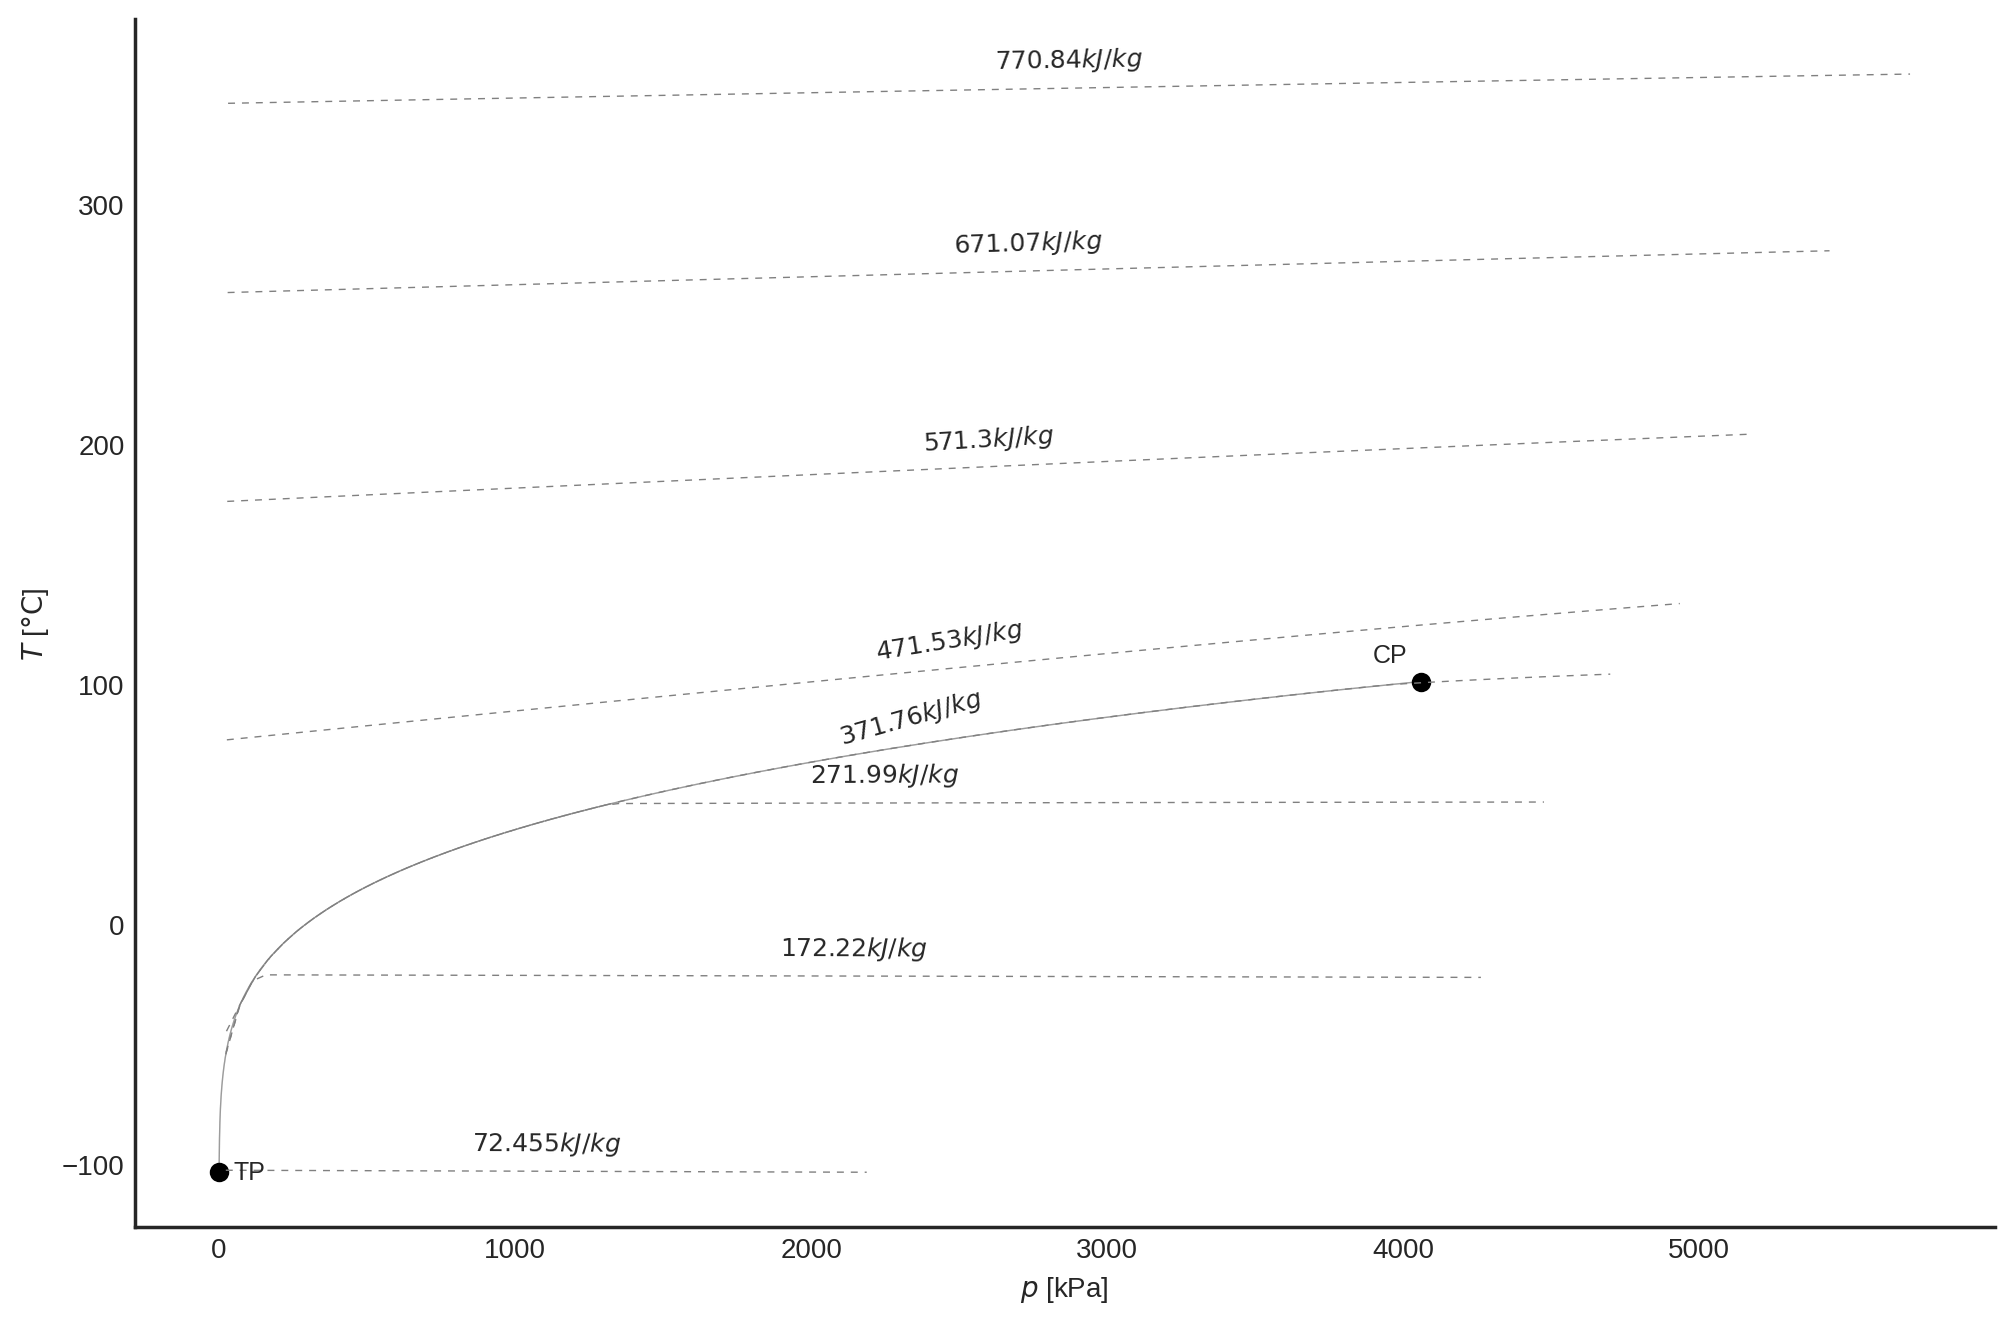

In [6]:
Tp = ref.property_diagram(x='p',y='T')
Tp.plot_triple_point()
Tp.plot_critical_point()

h_min = ref.h(T=ref.T_triple,x=0).magnitude
h_max = ref.h(T=ref.T_critical,x=0).magnitude*3
for i in np.arange(h_min+1,h_max,(h_max-h_min)/11):  
    try:
        Tp.plot_isenthalp(Quantity(i,'kJ/kg'),preserve_limits=False,pos=.5)
    except:
        break

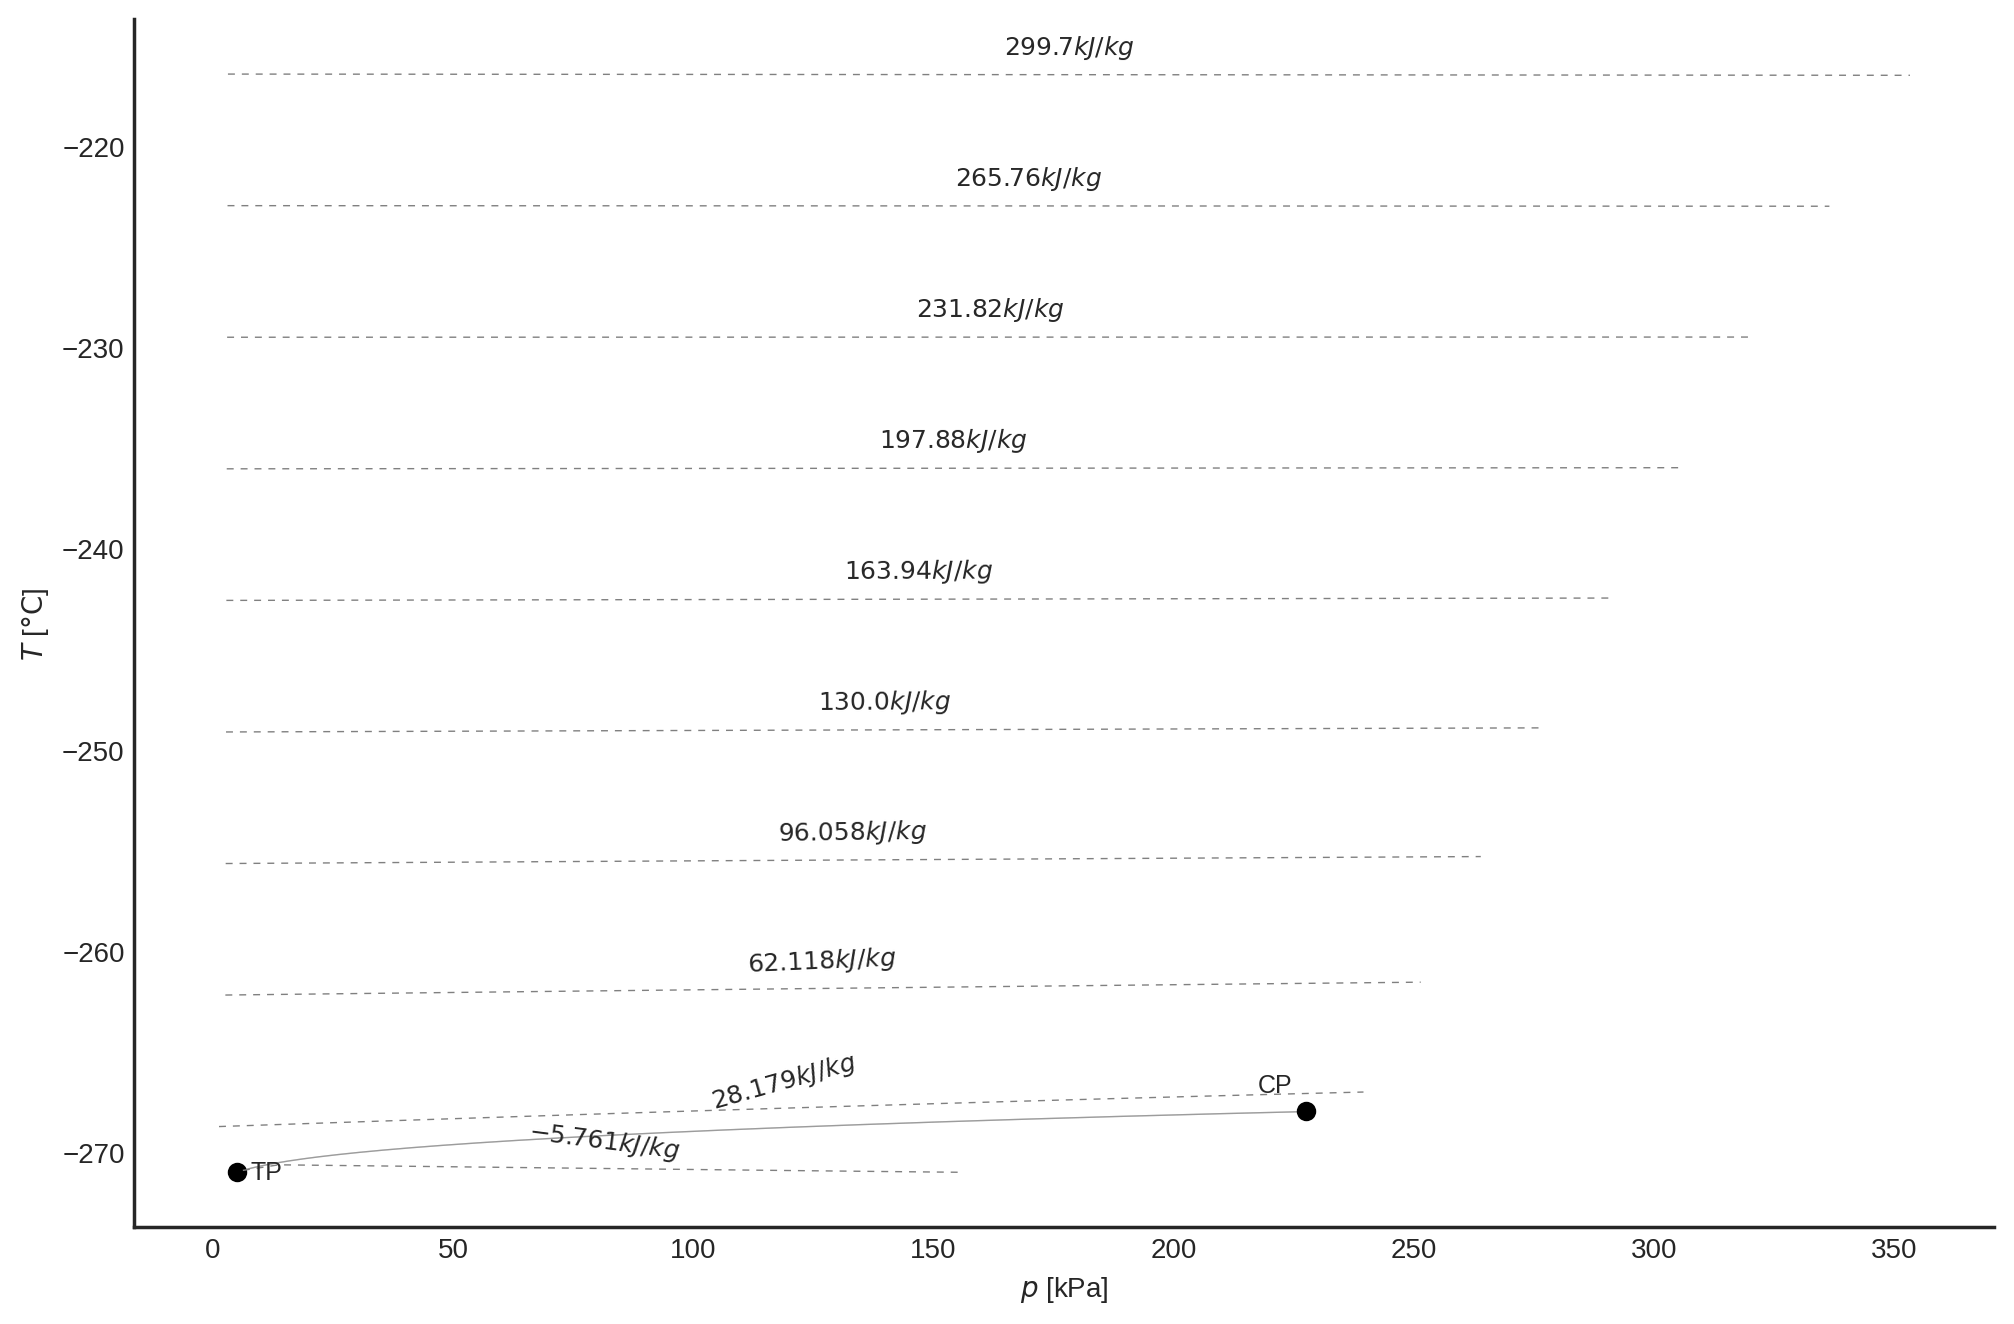

In [7]:
ref = realfluid.Properties('helium')
Tp = ref.property_diagram(x='p',y='T')
Tp.plot_triple_point()
Tp.plot_critical_point()

h_min = ref.h(T=ref.T_triple,x=0).magnitude
h_max = ref.h(T=ref.T_critical,x=0).magnitude*30
for i in np.arange(h_min+1,h_max,(h_max-h_min)/10):  
    try:
        Tp.plot_isenthalp(Quantity(i,'kJ/kg'),preserve_limits=False,pos=.5)
    except:
        break

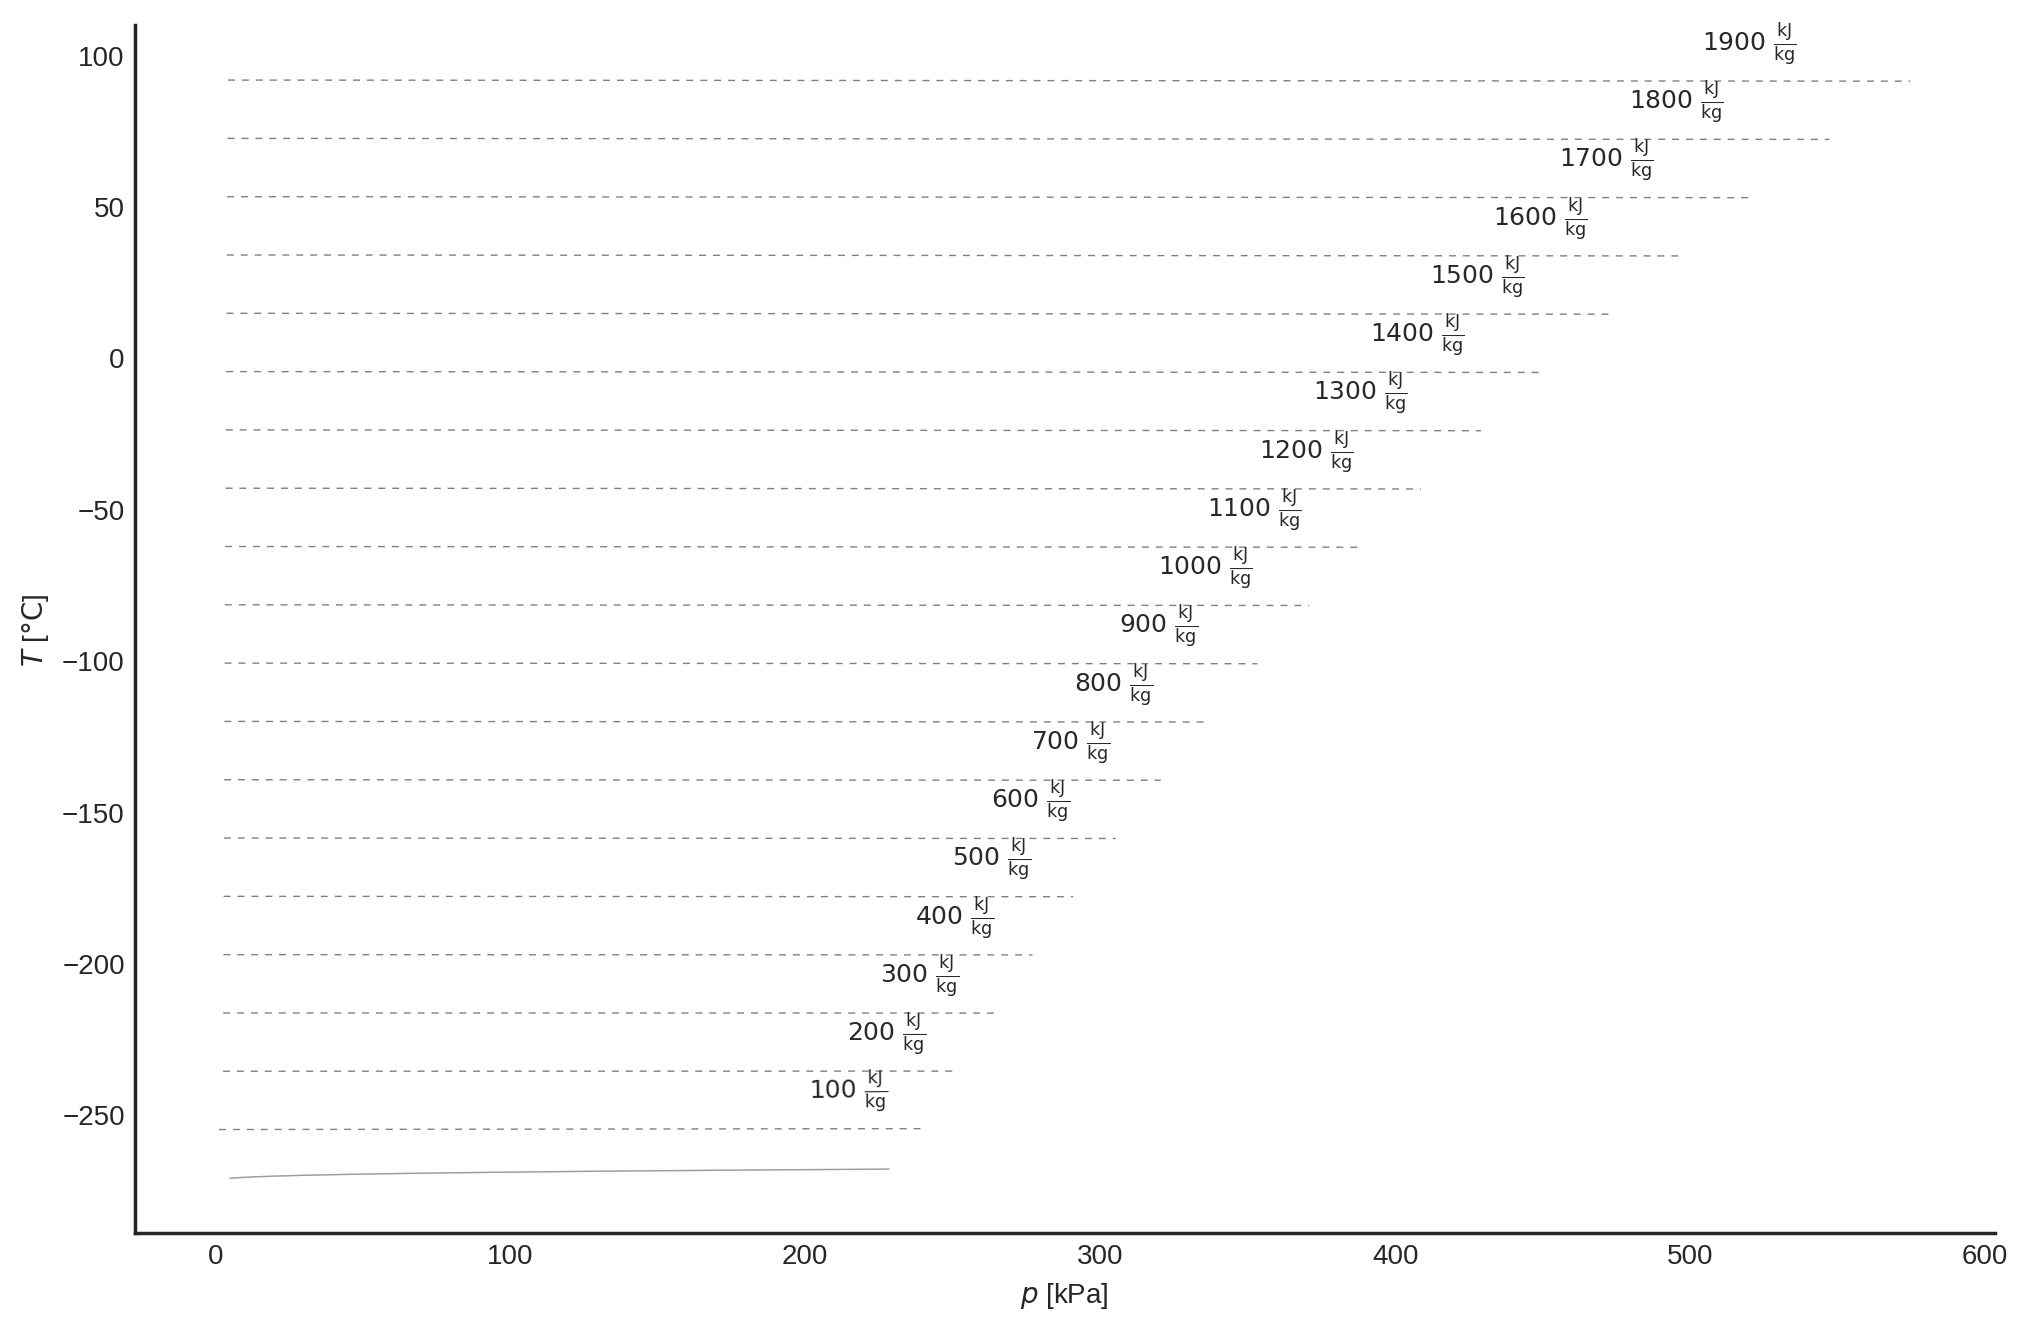

In [8]:
plt = ref.property_diagram(x='p',y='T')

for i in range(100,2000,100):
    try:
        plt.plot_isenthalp(Quantity(i,'kJ/kg'),preserve_limits=False)
    except:
        break

In [0]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 5) Execute this cell to create an HTML file showing only the output 
# 6) Submit the .html file located in the folder with this notebook

!jupyter nbconvert --no-input --no-prompt --to html "Ex12.2 - Joule-Thomson Coefficient.ipynb"